In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import astropy.units as u
import starry
from scipy import integrate

starry.config.lazy = False
starry.config.quiet = True

In [2]:
#Write txt file data into a numpy array, ignoring the first row
basalt = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-rock-basalt-solid-ASTER.txt', skiprows=26)
granite = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-rock-granite-solid-alkalic-ASTER.txt', skiprows=26)
sand = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-soil-sand-brown_loamy_fine-ASTER.txt', skiprows=26)
grass = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-vegetation-grass-lawn-ASTER.txt', skiprows=26)
trees = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-vegetation-trees-deciduous-ASTER.txt', skiprows=26)
cloud = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-water-cloud-MODIS.txt', skiprows=26)
coast = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-water-coast-USGS+ASTER.txt', skiprows=26)
snow = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-water-fine_snow-ASTER.txt', skiprows=26)
sea = np.loadtxt('/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/albedo-water-seawater-USGS+ASTER.txt', skiprows=26)

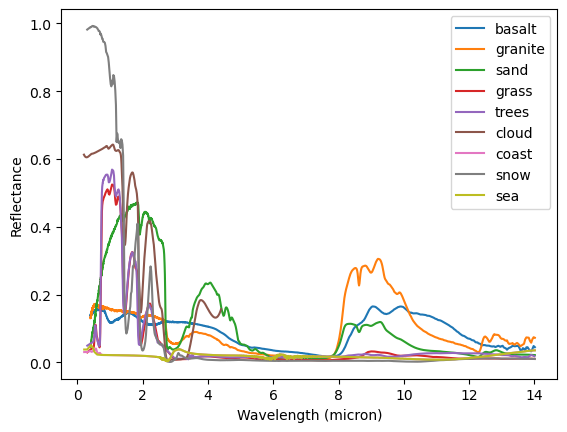

In [3]:
basalt[:, 1] = basalt[:, 1] / 100.
granite[:, 1] = granite[:, 1] / 100.
sand[:, 1] = sand[:, 1] / 100.
grass[:, 1] = grass[:, 1] / 100.
trees[:, 1] = trees[:, 1] / 100.
snow[:, 1] = snow[:, 1] / 100.

basalt = np.flip(basalt, axis=0)
granite = np.flip(granite, axis = 0)
sand = np.flip(sand, axis =0)


plt.plot(basalt[:,0], basalt[:,1], label='basalt')
plt.plot(granite[:,0], granite[:,1], label='granite')
plt.plot(sand[:,0], sand[:,1], label='sand')
plt.plot(grass[:,0], grass[:,1], label='grass')
plt.plot(trees[:,0], trees[:,1], label='trees')
plt.plot(cloud[:,0], cloud[:,1], label='cloud')
plt.plot(coast[:,0], coast[:,1], label='coast')
plt.plot(snow[:,0], snow[:,1], label='snow')
plt.plot(sea[:,0], sea[:,1], label='sea')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

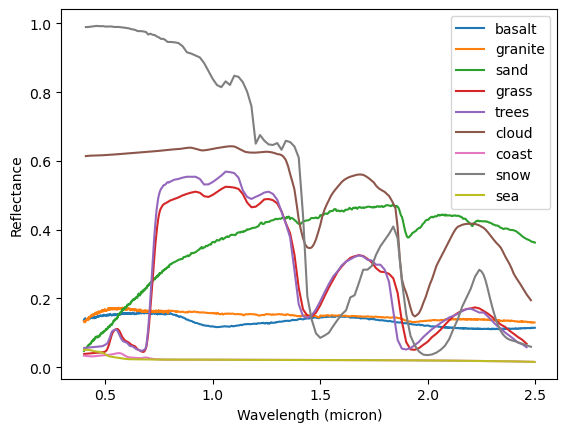

In [4]:
#Create a dictionary of the spectra
spectra = {'basalt': basalt, 'granite': granite, 'sand': sand, 'grass': grass, 'trees': trees, 'cloud': cloud, 'coast': coast, 'snow': snow, 'sea': sea}

for key in spectra:
    i = np.where(spectra[key][:,0] > 0.4)
    j = np.where(spectra[key][:,0] < 2.5)
    spectra[key] = spectra[key][np.min(i):np.max(j),:]
    plt.plot(spectra[key][:,0], spectra[key][:,1], label=key)

plt.xlabel('Wavelength (micron)')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

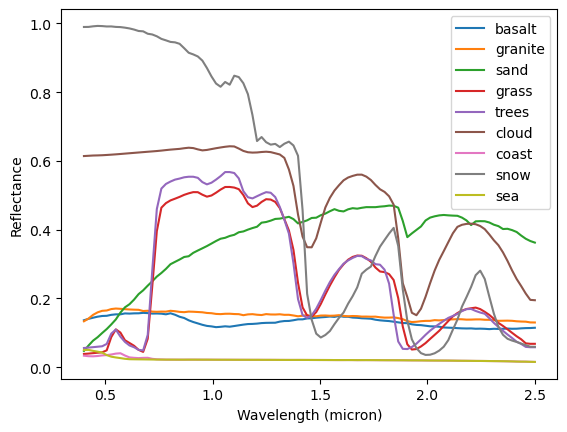

In [5]:
wav = np.linspace(0.4, 2.5, 100)

for key in spectra:
    resamp = np.interp(wav, spectra[key][:,0], spectra[key][:,1])
    spectra[key] = np.column_stack((wav, resamp))
    plt.plot(spectra[key][:,0], spectra[key][:,1], label=key)

plt.xlabel('Wavelength (micron)')
plt.ylabel('Reflectance')
plt.legend()   
plt.show()

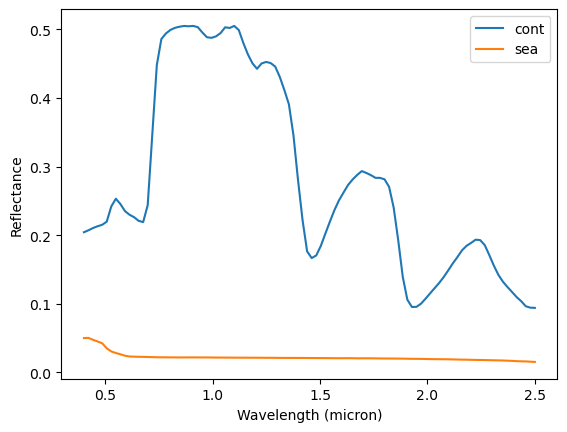

In [6]:
cont =  (0.3 * spectra['grass'][:,1] + 
        0.3 * spectra['trees'][:,1] +
        0.09 * spectra['granite'][:,1] + 
        0.09 * spectra['basalt'][:,1] +
        0.07 * spectra['sand'][:,1] +
        0.15 * spectra['snow'][:,1])
spectra['cont'] = np.column_stack((wav, cont))

plt.plot(spectra['cont'][:,0], spectra['cont'][:,1], label='cont')
plt.plot(spectra['sea'][:,0], spectra['sea'][:,1], label='sea')
#plt.plot(spectra['grass'][:,0], spectra['grass'][:,1], label='grass')
plt.xlabel('Wavelength (micron)')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

In [9]:
ydeg = 20
nw = 100

map = starry.Map(ydeg = ydeg, nw = nw, reflected=True, wav = wav)
map.amp = spectra['sea'][:,1]


In [33]:
def build_continents(spec, coverage = 0.4, min_size = 20, max_size = 80, num = 6, map = None, size = None):
    cum_coverage = 0
    
    if map is None:
        map = np.zeros((320, 640))
    else:
        print('Figure this out later...')

    if size is None:
        for i in range(num):
            size = np.random.uniform(min_size, np.max((max_size, (coverage - cum_coverage)* 720.)))
            
            lon = np.random.uniform(0 + size, 640 - size)
            lat = np.random.uniform(0 + size, 320 - size)

            r_pix = int(size / 640. * 360)

            for x, y in np.ndindex(map.shape):
                if (x - lat)**2 + (y - lon)**2 < r_pix**2:
                    map[x, y] = 1

            cum_coverage = np.count_nonzero(map) / (320. * 640.)
    else: 
        for i in range(num):
            #cum_coverage += size / 720.
            lon = np.random.uniform(0 + size, 640 - size)
            lat = np.random.uniform(0 + size, 320 - size) 

            r_pix = int(size / 640. * 360)

            for x, y in np.ndindex(map.shape):
                if (x - lat)**2 + (y - lon)**2 < r_pix**2:
                    map[x, y] = 1

    print(np.count_nonzero(map) / (320. * 640.))
    print(cum_coverage)
    plt.imshow(map)
    plt.show()

    return map

    

0.2988525390625
0


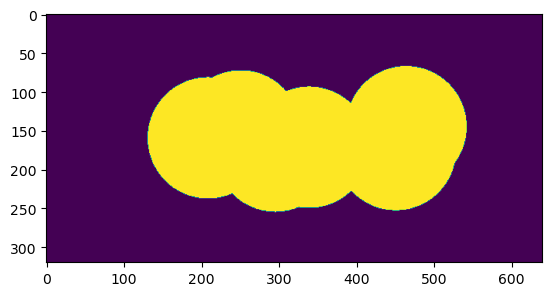

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
build_continents(spectra['cont'], size = 140, num = 6)

In [50]:
def add_clouds(min_size = 30, max_size = 140, num = 6):

    map = np.zeros((320, 640))
    coverage = 0
    cum_coverage = 0

    for i in range(num):
        size = np.random.uniform(min_size, np.max((max_size, (coverage - cum_coverage)* 720.)))
        
        lon = np.random.uniform(0, 640)
        lat = np.random.uniform(0, 320)

        r_pix = int(size / 640. * 360)

        for x, y in np.ndindex(map.shape):
            if (x - lat)**2 + (y - lon)**2 < r_pix**2:
                map[x, y] = 1

        cum_coverage = np.count_nonzero(map) / (320. * 640.)

    print(np.count_nonzero(map) / (320. * 640.))
    print(cum_coverage)
    plt.imshow(map)
    plt.show()

    return map


0.3645263671875
0.3645263671875


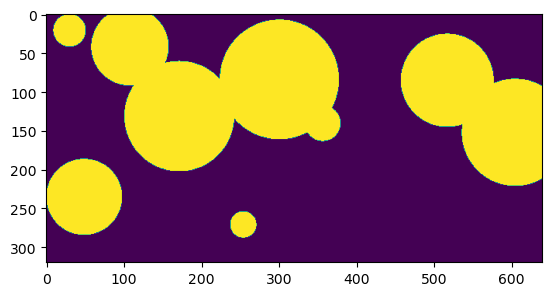

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
add_clouds(num = 10)

ValueError: not enough values to unpack (expected 2, got 0)

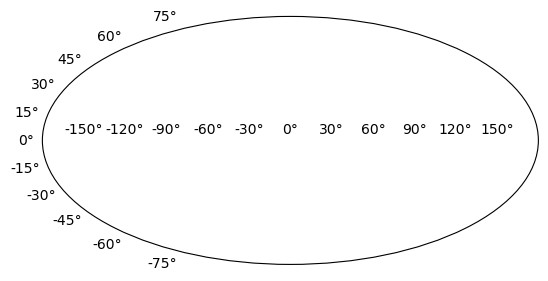

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide')

lon = np.linspace(-np.pi, np.pi,360)
lat = np.linspace(-np.pi/2., np.pi/2.,180)
Lon,Lat = np.meshgrid(lon,lat)

im = ax.pcolormesh(Lon,Lat, '/Users/andrew/Desktop/QMUL/PhD/photosynth/spectra/bayes_paper/snow.png', cmap=plt.cm.jet)

plt.show()